<a href="https://colab.research.google.com/github/Janaki26/Predicting-Breast-Cancer-Using-ML/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries



In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

#Reading data set(csv file)

In [ ]:
df = pd.read_csv('/content/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#EDA-Exploratory Data Analysis

In [ ]:
df.head() #displaying the header of the dataset
df.describe() #displaying the description of the dataset in the rows

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# general summary of the dataframe
df.info() #displaying the content of the data, data types, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape #what is the dimensions of the dataset

(569, 33)

In [ ]:
df.columns #displaying the column names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df['diagnosis'].value_counts  #getting an idea on the data included in the columns

<bound method IndexOpsMixin.value_counts of 0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object>

In [ ]:
# remove the 'Unnamed: 32' column
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [ ]:
# check the data type of each column
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# checking for null values

df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

#Data Visualization

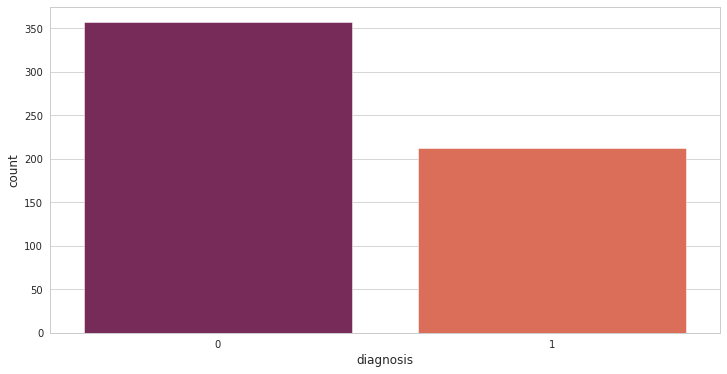

In [ ]:
# visualize distribution of classes 
#We want to see how much data is benign and how much is malignant
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x="diagnosis", data=df, palette='rocket');

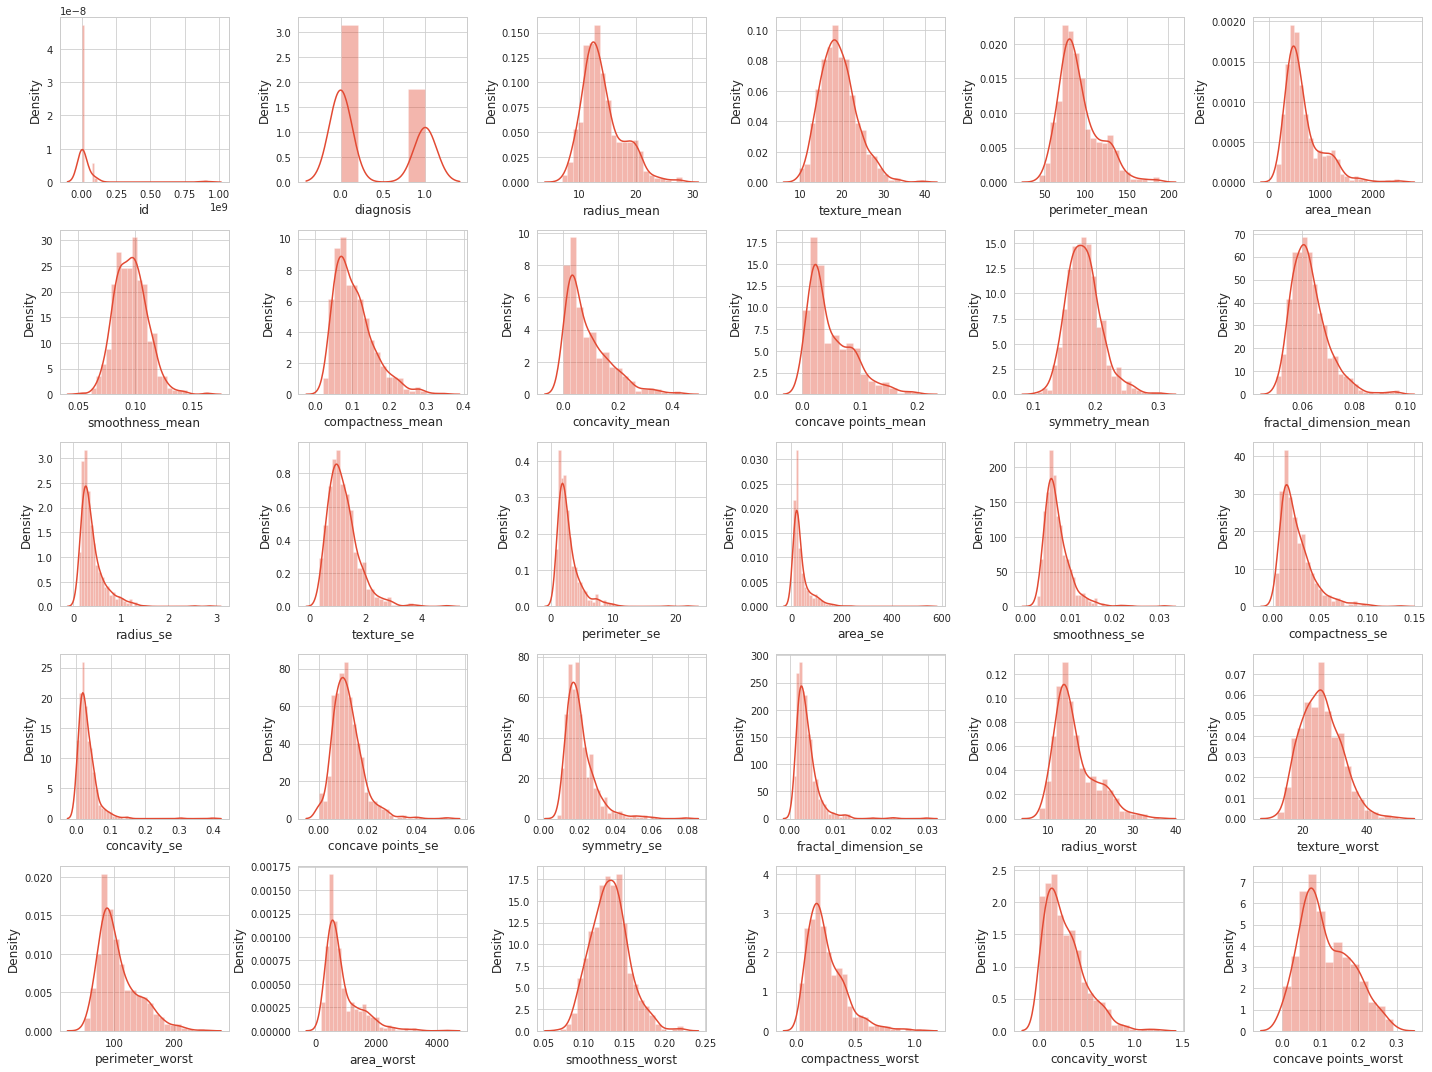

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

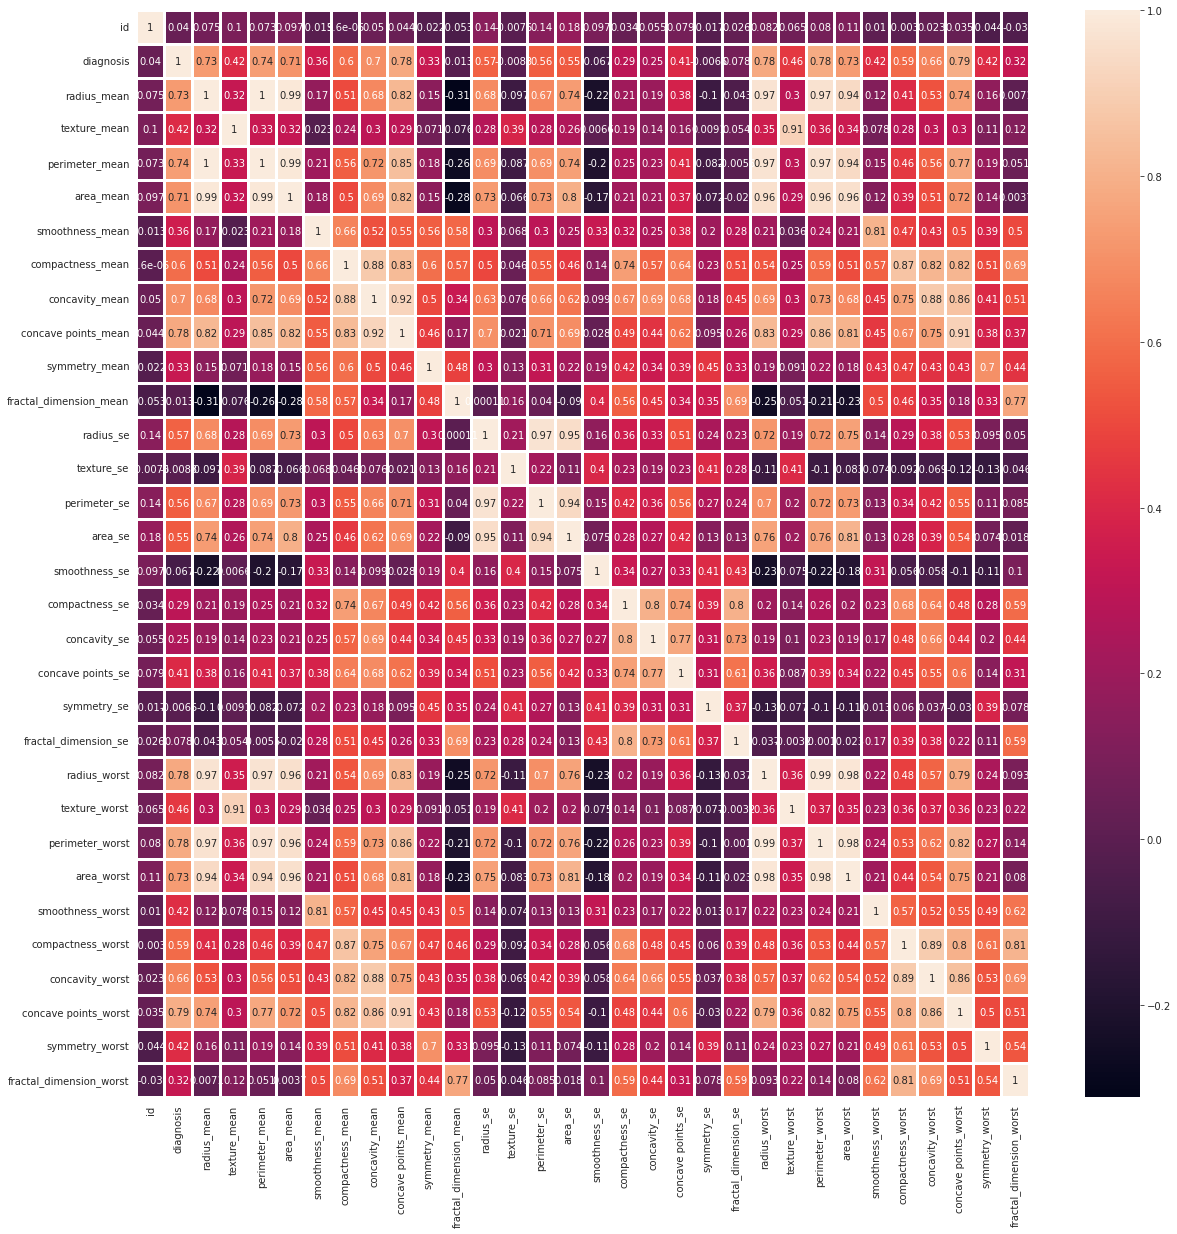

In [ ]:
#we can better visualize the correlation in color with. The lighter the color, the greater the correlation value.
plt.figure(figsize=(20, 20))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=2, cmap="rocket");

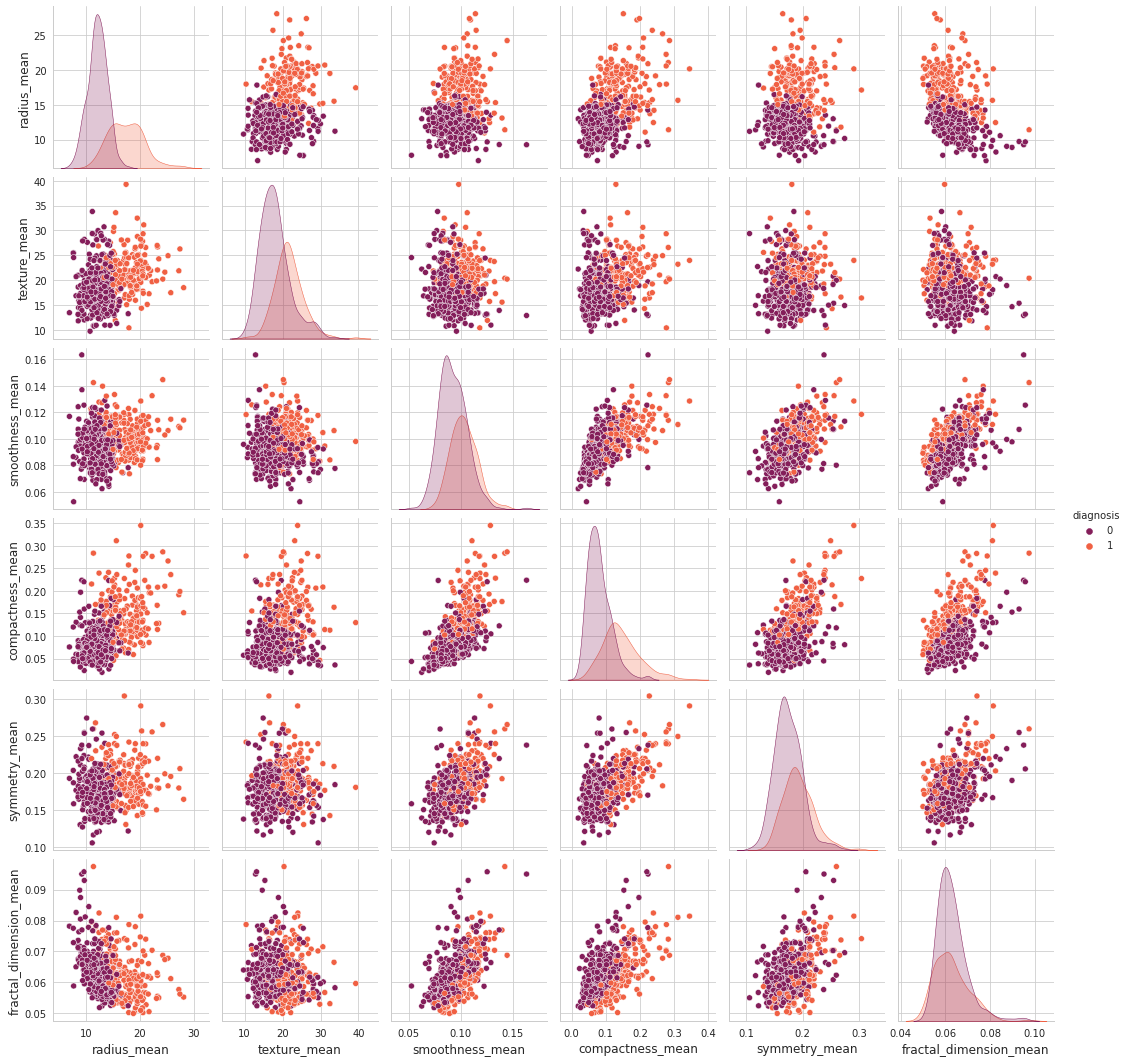

In [ ]:
#here's another set of correlation plots. We are plotting the diagnosis (maroon = malignant; orange = benign)
mean_col = ['diagnosis','radius_mean', 'texture_mean', 
        'smoothness_mean', 'compactness_mean', 
        'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(df[mean_col],hue = 'diagnosis', palette='rocket')

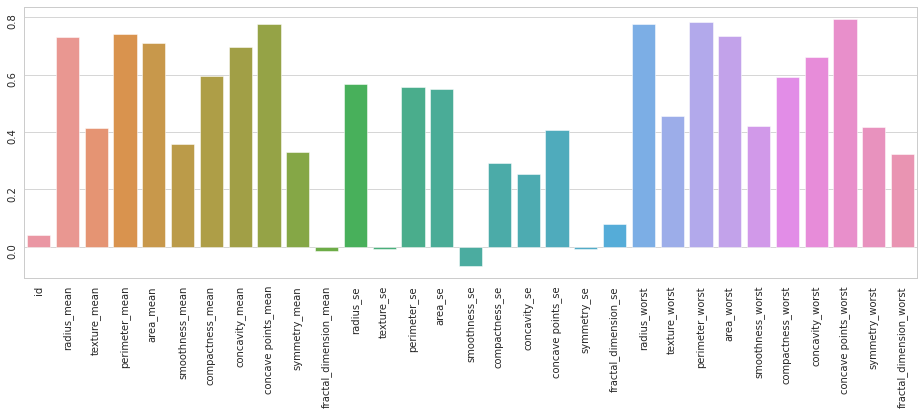

In [ ]:
df1=df.drop(['diagnosis'],axis=1)
plt.figure(figsize=(16,5))
ax=sns.barplot(df1.corrwith(df.diagnosis).index,df1.corrwith(df.diagnosis))
ax.tick_params(labelrotation=90)

In [ ]:
# removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")


The reduced dataframe has 24 columns.


In [ ]:
# creating features and label 

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

NameError: ignored

#Spliting data for training and testing

In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Check to see if it's a 70:30 split
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

398
171
398
171


#Data Scaling

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models/Algorithms

# Logistic Regression Classifier

In [ ]:
# LOGISTIC REGGRESSION MODEL
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred=lr_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_pred=lr_model.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report,confusion_matrix, mean_squared_error
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Printing the accuracy of the model
print("The accuracy of the LOGISTIC REGGRESSION Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
print("The precision of the LOGISTIC REGGRESSION Classifier Model is: ", precision_score(y_test, y_pred)*100, "%")
print("The recall of the LOGISTIC REGGRESSION Classifier Model is: ", recall_score(y_test, y_pred)*100, "%")
print("The F1-score of the LOGISTIC REGGRESSION Classifier Model is: ", f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[106   2]
 [  4  59]]
The accuracy of the LOGISTIC REGGRESSION Classifier Model is:  96.49122807017544 %
The precision of the LOGISTIC REGGRESSION Classifier Model is:  96.72131147540983 %
The recall of the LOGISTIC REGGRESSION Classifier Model is:  93.65079365079364 %
The F1-score of the LOGISTIC REGGRESSION Classifier Model is:  95.16129032258064 %


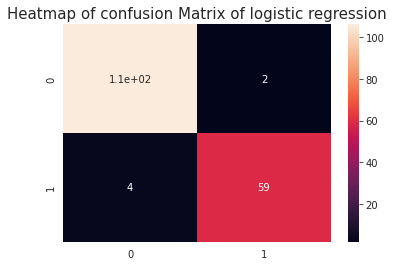

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
plt.title('Heatmap of confusion Matrix of logistic regression',fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

# KNN Classifier

In [ ]:
#KNN CLASSIFER

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 9)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

[[105   3]
 [  7  56]]
The accuracy of the K Neareset Neighbors Classifier Model is:  94.15204678362574 %
The precision of the K Neareset Neighbors Classifier Model is:  94.91525423728814 %
The recall of the K Neareset Neighbors Classifier Model is:  88.88888888888889 %
The F1-score of the K Neareset Neighbors Classifier Model is:  91.80327868852459 %


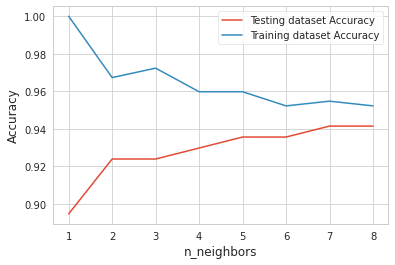

In [ ]:
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Printing the accuracy of the model
print("The accuracy of the K Neareset Neighbors Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
print("The precision of the K Neareset Neighbors Classifier Model is: ", precision_score(y_test, y_pred)*100, "%")
print("The recall of the K Neareset Neighbors Classifier Model is: ", recall_score(y_test, y_pred)*100, "%")
print("The F1-score of the K Neareset Neighbors Classifier Model is: ", f1_score(y_test, y_pred)*100, "%")

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

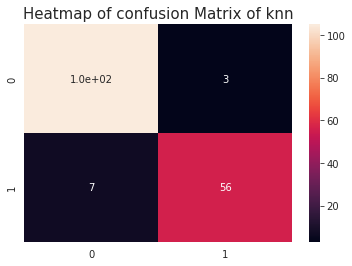

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
plt.title('Heatmap of confusion Matrix of knn',fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

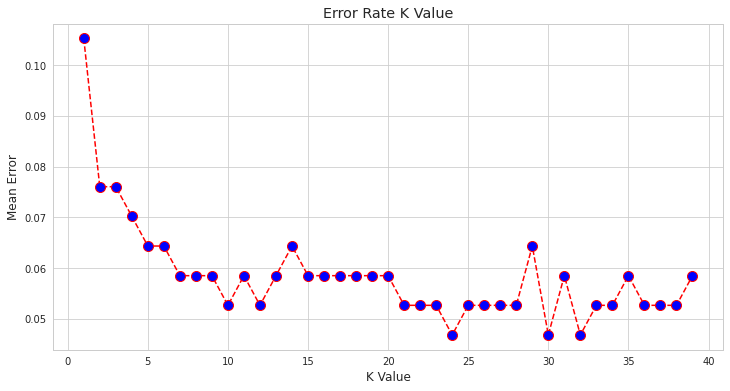

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Random Forest Model

In [ ]:
#RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=21,max_depth= 80, max_features= 3,min_samples_leaf= 5, 
                          min_samples_split=8,n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=5,
                       min_samples_split=8, random_state=21)

In [ ]:
y_pred=rfc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Printing the accuracy of the model
print("The accuracy of the Ramdom Forest Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
print("The precision of the Ramdom Forest Classifier Model is: ", precision_score(y_test, y_pred)*100, "%")
print("The recall of the Ramdom Forest Classifier Model is: ", recall_score(y_test, y_pred)*100, "%")
print("The F1-score of the Ramdom Forest Classifier Model is: ", f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

[[105   3]
 [  7  56]]
The accuracy of the Ramdom Forest Classifier Model is:  94.15204678362574 %
The precision of the Ramdom Forest Classifier Model is:  94.91525423728814 %
The recall of the Ramdom Forest Classifier Model is:  88.88888888888889 %
The F1-score of the Ramdom Forest Classifier Model is:  91.80327868852459 %


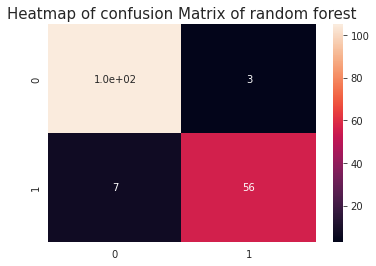

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
plt.title('Heatmap of confusion Matrix of random forest',fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

# SVM Model

In [ ]:
#SVM MODEL

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=1)
svc.fit(X_train, y_train)

SVC(random_state=1)

In [ ]:
y_pred=svc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
y_pred=svc.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Printing the accuracy of the model
print("The accuracy of the SVM Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
print("The precision of the SVM Classifier Model is: ", precision_score(y_test, y_pred)*100, "%")
print("The recall of the SVM Classifier Model is: ", recall_score(y_test, y_pred)*100, "%")
print("The F1-score of the SVM Classifier Model is: ", f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   1]
 [  4  59]]
The accuracy of the SVM Classifier Model is:  97.07602339181285 %
The precision of the SVM Classifier Model is:  98.33333333333333 %
The recall of the SVM Classifier Model is:  93.65079365079364 %
The F1-score of the SVM Classifier Model is:  95.93495934959351 %


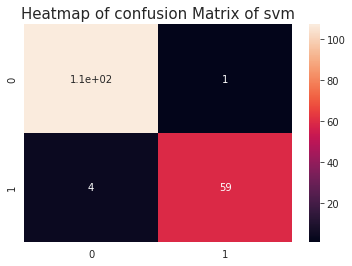

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
plt.title('Heatmap of confusion Matrix of svm',fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

# Voting Classifier

In [ ]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('logreg',lr_model),('knn', knn), ('rf', rfc), ('svc', svc)],voting='hard', weights = [1, 1,1,1])
    
voting_clf.fit(X_train,y_train)

y_pred = voting_clf.predict(X_test)
#y_score = voting_clf.predict_proba(X_test)[:,1]

# Confusion maxtrix
#cm = confusion_matrix(y_test, y_pred)
#class_names = [0,1]
#show_metrics()
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("The accuracy of the voting Classifier Model is: ", accuracy_score(y_test, y_pred)*100, "%")
print("The precision of the voting Classifier Model is: ", precision_score(y_test, y_pred)*100, "%")
print("The recall of the voting Classifier Model is: ", recall_score(y_test, y_pred)*100, "%")
print("The F1-score of the voting Classifier Model is: ", f1_score(y_test, y_pred)*100, "%")

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

[[107   1]
 [  7  56]]
The accuracy of the voting Classifier Model is:  95.32163742690058 %
The precision of the voting Classifier Model is:  98.24561403508771 %
The recall of the voting Classifier Model is:  88.88888888888889 %
The F1-score of the voting Classifier Model is:  93.33333333333333 %


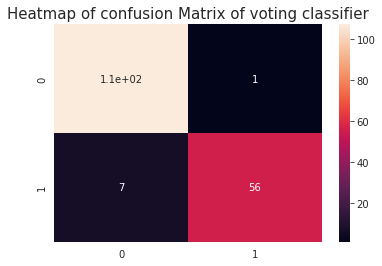

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
plt.title('Heatmap of confusion Matrix of voting classifier',fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()